In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = '/home/kp/programming/course2021PDCT/image_repo/example1_160/train'
valid_path = '/home/kp/programming/course2021PDCT/image_repo/example1_160/valid'
test_path = '/home/kp/programming/course2021PDCT/image_repo/example1_160/test'
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['benign', 'malignant'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['benign', 'malignant'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['benign', 'malignant'], batch_size=10, shuffle=False)


imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Found 110 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [6]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
11/11 - 2s - loss: 56.4399 - accuracy: 0.5182 - val_loss: 73.1987 - val_accuracy: 0.5000
Epoch 2/10
11/11 - 2s - loss: 29.7852 - accuracy: 0.6182 - val_loss: 21.7178 - val_accuracy: 0.7000
Epoch 3/10
11/11 - 2s - loss: 13.4084 - accuracy: 0.7909 - val_loss: 72.3934 - val_accuracy: 0.5000
Epoch 4/10
11/11 - 2s - loss: 6.7275 - accuracy: 0.8455 - val_loss: 51.8540 - val_accuracy: 0.3667
Epoch 5/10
11/11 - 3s - loss: 3.7732 - accuracy: 0.8545 - val_loss: 46.1965 - val_accuracy: 0.4000
Epoch 6/10
11/11 - 2s - loss: 1.4024 - accuracy: 0.9364 - val_loss: 41.6816 - val_accuracy: 0.3667
Epoch 7/10
11/11 - 2s - loss: 1.2461 - accuracy: 0.8909 - val_loss: 45.1624 - val_accuracy: 0.3667
Epoch 8/10
11/11 - 3s - loss: 1.8112 - accuracy: 0.8909 - val_loss: 28.7365 - val_accuracy: 0.4333
Epoch 9/10
11/11 - 2s - loss: 1.3106 - accuracy: 0.9000 - val_loss: 36.6685 - val_accuracy: 0.3667
Epoch 10/10
11/11 - 3s - loss: 0.9414 - accuracy: 0.9273 - val_loss: 28.9249 - val_accuracy: 0.4000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

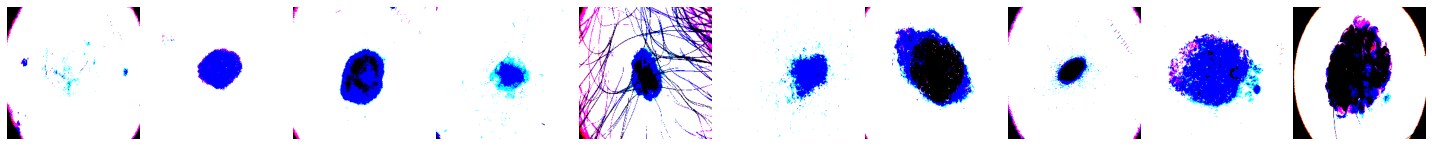

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [7]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [8]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [11]:
#np.round(predictions)
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
#test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
test_batches.class_indices

{'benign': 0, 'malignant': 1}

Confusion matrix, without normalization
[[ 1  9]
 [ 0 10]]


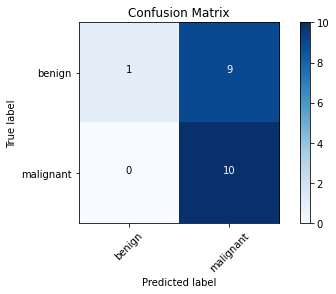

In [14]:
cm_plot_labels = ['benign','malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [15]:
# So here we use the VGG-16-model, pretrained
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [16]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [18]:
for layer in model.layers:
    # Freezing weights
    layer.trainable = False

In [19]:
# Only adding one output layer for binary classification
model.add(Dense(units=2, activation='softmax'))

In [20]:
# This is our VGG-16-model, but with our own output layer
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [21]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
11/11 - 3s - loss: 0.5123 - accuracy: 0.7364 - val_loss: 0.8955 - val_accuracy: 0.5000
Epoch 2/10
11/11 - 2s - loss: 0.4720 - accuracy: 0.7545 - val_loss: 0.8828 - val_accuracy: 0.5000
Epoch 3/10
11/11 - 3s - loss: 0.4424 - accuracy: 0.7727 - val_loss: 0.9151 - val_accuracy: 0.5000
Epoch 4/10
11/11 - 3s - loss: 0.4160 - accuracy: 0.7909 - val_loss: 0.9432 - val_accuracy: 0.5000
Epoch 5/10
11/11 - 2s - loss: 0.3877 - accuracy: 0.8273 - val_loss: 0.9068 - val_accuracy: 0.5000
Epoch 6/10
11/11 - 3s - loss: 0.3708 - accuracy: 0.8455 - val_loss: 0.9014 - val_accuracy: 0.5000
Epoch 7/10
11/11 - 3s - loss: 0.3498 - accuracy: 0.8727 - val_loss: 0.9581 - val_accuracy: 0.5333
Epoch 8/10
11/11 - 3s - loss: 0.3337 - accuracy: 0.8818 - val_loss: 0.9568 - val_accuracy: 0.5333
Epoch 9/10
11/11 - 3s - loss: 0.3202 - accuracy: 0.8909 - val_loss: 0.9397 - val_accuracy: 0.5000
Epoch 10/10
11/11 - 3s - loss: 0.3050 - accuracy: 0.8818 - val_loss: 0.9869 - val_accuracy: 0.5333


In [24]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

Confusion matrix, without normalization
[[1 9]
 [1 9]]


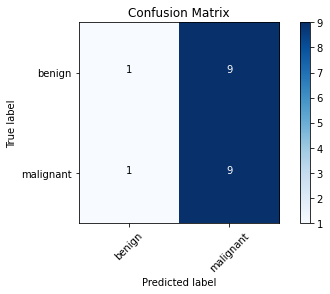

In [25]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['benign','malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')